#  CASE STUDY ON ANOVA

## Importing Libraries 

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Dataset Information

In [5]:
data=pd.read_csv('Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [6]:
#Schema of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [7]:
#Descriptional statistics of the data
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


#  Q1.) The mean sales generated by each zone

In [9]:
data1=data.drop('Month',axis=1)
zone_mean = data1.mean().round(2)
zone_mean

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

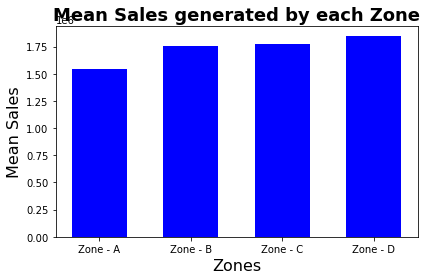

In [11]:
plt.bar(data1.columns, zone_mean, color ='blue',width = 0.6)
plt.xlabel("Zones",fontsize=16)
plt.ylabel("Mean Sales",fontsize=16)
plt.title("Mean Sales generated by each Zone", fontsize=18, fontweight ='bold')
plt.tight_layout()
plt.show()

Conclusions:  Zone-A has the least mean sale and Zone-D has the highest mean sale

#  Q2.) Total sales generated by all the zones for each month

In [14]:
data['Total_sales']=data[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(axis=1)
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total,Total_sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210,7128210


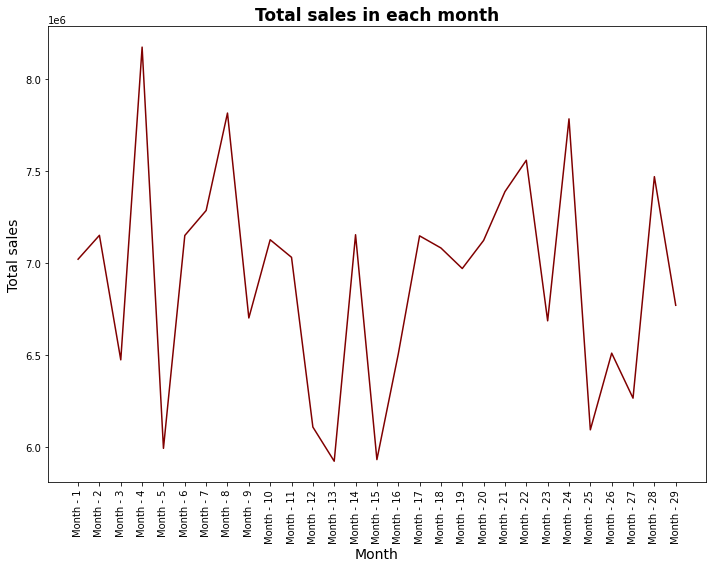

In [15]:
plt.figure(figsize=(10,8))
plt.plot(data['Month'],data['Total_sales'],color ='maroon')
plt.title('Total sales in each month', fontsize=17,fontweight ='bold')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Total sales',fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The highest sales was in Month-4 and the lowest sales was in Month-13

#  Q3.) Check whether all the zones generate the same amount of sales.

Here, we use one way ANOVA test

Let,

H0: All the zones generate same amount of sales

H1: All the zones does not generate samamount of sales

significance level, alpha = 0.05

In [19]:
fvalue,pvalue=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
print('F-statistic= %0.4f and P-value =%0.4f'%(fvalue,pvalue))


F-statistic= 5.6721 and P-value =0.0012


Since pvalue is less than 0.05 we reject the null hypothesis. 

Conclusion:All the zones does not generate the same amount of sales